# Multiple Regression Model

### Approach
* Write the function which gives us predicted value y hat. 
* Write a function to compute the cost.
* Write a function to get delta gradient.
* Implement gradient descend from above. 

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

We will use example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  


In [2]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
print(x_train)
print(y_train)

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
[460 232 178]


In [3]:
#Here x is the feature vector, w is the parameter vector and b is bias.
def predict(x,w,b):
    return np.dot(x,w) + b

In [4]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(predict(x_train[0], w_init, b_init))

459.9999976194083


In [5]:
# xs is m training set for x
#y is output vector
#w is parameter vector and b is bias
def compute_cost(xs, y, w, b):
    m = xs.shape[0]
    cost = 0
    for i in range(m):
        cost = cost + ( predict(xs[i], w, b) - y[i])**2
    return cost / (2 * m)    
    

In [6]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


<a name="toc_15456_5"></a>
# 5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [7]:
def gradient(x_train, y_train, w, b):
    m,n = x_train.shape # n is number of features.
    
    w_delta = np.zeros((n,))
    b_delta = 0.0
    
    for i in range(m):
        err = predict(x_train[i], w, b) - y_train[i]
        b_delta = b_delta + err 
        for j in range(n):
            w_delta[j] = w_delta[j] + err * x_train[i][j]
    
    return (w_delta/m, b_delta/m)
    
    

In [8]:
tmp_dj_dw, tmp_dj_db  = gradient(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]


In [12]:
def gradient_descent(x_train, y_train, w_in, b_in, a, num_iter):
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    j_history = []
    
    for i in range(num_iter):
        w_delta, b_delta = gradient(x_train, y_train, w, b)
        w = w - a * w_delta
        b = b - a * b_delta
        cost = compute_cost(x_train, y_train, w, b)
        j_history.append(cost)
        
        if i % 10 == 0:
            print(f"Iteration {i:4d}: Cost {j_history[-1]:8.2f}   ")
    
    return (w,b, j_history)

In [13]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, j_history = gradient_descent(x_train, y_train, initial_w, initial_b,alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration   10: Cost   696.96   
Iteration   20: Cost   696.85   
Iteration   30: Cost   696.74   
Iteration   40: Cost   696.64   
Iteration   50: Cost   696.53   
Iteration   60: Cost   696.42   
Iteration   70: Cost   696.31   
Iteration   80: Cost   696.21   
Iteration   90: Cost   696.10   
Iteration  100: Cost   695.99   
Iteration  110: Cost   695.88   
Iteration  120: Cost   695.78   
Iteration  130: Cost   695.67   
Iteration  140: Cost   695.56   
Iteration  150: Cost   695.45   
Iteration  160: Cost   695.35   
Iteration  170: Cost   695.24   
Iteration  180: Cost   695.13   
Iteration  190: Cost   695.03   
Iteration  200: Cost   694.92   
Iteration  210: Cost   694.81   
Iteration  220: Cost   694.71   
Iteration  230: Cost   694.60   
Iteration  240: Cost   694.50   
Iteration  250: Cost   694.39   
Iteration  260: Cost   694.28   
Iteration  270: Cost   694.18   
Iteration  280: Cost   694.07   
Iteration  290: Cost   693.97   
Iteration 

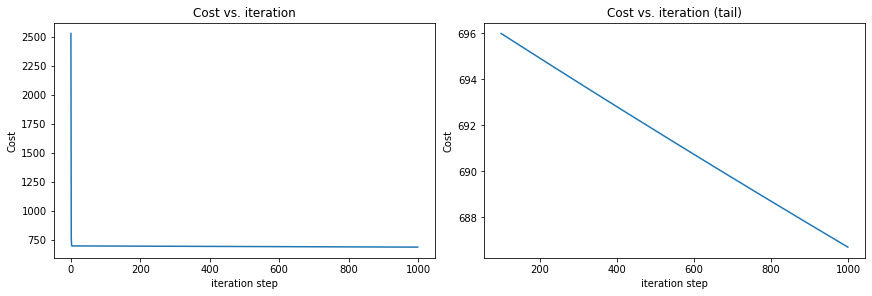

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_history)
ax2.plot(100 + np.arange(len(j_history[100:])), j_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

As we can see above the Cost is still decreasing and hence not converged. In next exercise we would see how to fix it by having right values for alpha (learning rate). 